In [7]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
from shapely.plotting import plot_polygon

import xarray as xr

In [8]:
cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')

In [4]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
mask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

In [2]:
def def_polys():
    # boxes from Vicente: Regions_functions_V2.py
    # Northern Strait Subregion Northwest
    Nx1_1, Ny1_1 = [132,170], [665,680]
    Nx1_2, Ny1_2 = [170,200], [680,620]
    Nx1_3, Ny1_3 = [135,200], [620,620]

    # Southern Strait: Subregion North
    Sx1_1, Sy1_1 = [202,292], [505,505]
    Sx1_2, Sy1_2 = [300,315], [505,480]   # not used
    Sx1_3, Sy1_3 = [210,238], [500,465]   # not used
    Sx1_4, Sy1_4 = [238,245], [465,410]
    Sx1_5, Sy1_5 = [302, 280], [410, 470]
    Sx1_6, Sy1_6 = [245,302], [410,410]    # not used
    
    N1_lon_1, N1_lat_1 = [mask.nav_lon[Ny1_1[0],Nx1_1[0]].values, mask.nav_lon[Ny1_1[1],Nx1_1[1]].values], [mask.nav_lat[Ny1_1[0],Nx1_1[0]].values, mask.nav_lat[Ny1_1[1],Nx1_1[1]].values]
    N1_lon_2, N1_lat_2 = [mask.nav_lon[Ny1_2[0],Nx1_2[0]].values, mask.nav_lon[Ny1_2[1],Nx1_2[1]].values], [mask.nav_lat[Ny1_2[0],Nx1_2[0]].values, mask.nav_lat[Ny1_2[1],Nx1_2[1]].values]
    N1_lon_3, N1_lat_3 = [mask.nav_lon[Ny1_3[0],Nx1_3[0]].values, mask.nav_lon[Ny1_3[1],Nx1_3[1]].values], [mask.nav_lat[Ny1_3[0],Nx1_3[0]].values, mask.nav_lat[Ny1_3[1],Nx1_3[1]].values]

    S1_lon_1, S1_lat_1 = [mask.nav_lon[Sy1_1[0],Sx1_1[0]].values, mask.nav_lon[Sy1_1[1],Sx1_1[1]].values], [mask.nav_lat[Sy1_1[0],Sx1_1[0]].values, mask.nav_lat[Sy1_1[1],Sx1_1[1]].values]
    S1_lon_2, S1_lat_2 = [mask.nav_lon[Sy1_2[0],Sx1_2[0]].values, mask.nav_lon[Sy1_2[1],Sx1_2[1]].values], [mask.nav_lat[Sy1_2[0],Sx1_2[0]].values, mask.nav_lat[Sy1_2[1],Sx1_2[1]].values]
    S1_lon_3, S1_lat_3 = [mask.nav_lon[Sy1_3[0],Sx1_3[0]].values, mask.nav_lon[Sy1_3[1],Sx1_3[1]].values], [mask.nav_lat[Sy1_3[0],Sx1_3[0]].values, mask.nav_lat[Sy1_3[1],Sx1_3[1]].values]
    S1_lon_4, S1_lat_4 = [mask.nav_lon[Sy1_4[0],Sx1_4[0]].values, mask.nav_lon[Sy1_4[1],Sx1_4[1]].values], [mask.nav_lat[Sy1_4[0],Sx1_4[0]].values, mask.nav_lat[Sy1_4[1],Sx1_4[1]].values]
    S1_lon_5, S1_lat_5 = [mask.nav_lon[Sy1_5[0],Sx1_5[0]].values, mask.nav_lon[Sy1_5[1],Sx1_5[1]].values], [mask.nav_lat[Sy1_5[0],Sx1_5[0]].values, mask.nav_lat[Sy1_5[1],Sx1_5[1]].values]
    S1_lon_6, S1_lat_6 = [mask.nav_lon[Sy1_6[0],Sx1_6[0]].values, mask.nav_lon[Sy1_6[1],Sx1_6[1]].values], [mask.nav_lat[Sy1_6[0],Sx1_6[0]].values, mask.nav_lat[Sy1_6[1],Sx1_6[1]].values]

    polygon_lon_lat_N1 = [
    (N1_lon_1[0], N1_lat_1[0]),
    (N1_lon_1[1], N1_lat_1[1]),
    (N1_lon_2[1], N1_lat_2[1]),
    (N1_lon_3[1], N1_lat_3[1]),
    (N1_lon_3[0], N1_lat_3[0])
    ]
    polygon_coors_N1 = Polygon(polygon_lon_lat_N1)

    polygon_lon_lat_S1 = [
    (S1_lon_1[0], S1_lat_1[0]),
    (S1_lon_1[1], S1_lat_1[1]),
#    (S1_lon_2[1], S1_lat_2[1]),
    (S1_lon_5[1], S1_lat_5[1]),
#    (S1_lon_6[1], S1_lat_6[1]),
#    (S1_lon_6[0], S1_lat_6[0]),
    (S1_lon_4[0], S1_lat_4[0])
    ]
    polygon_coors_S1 = Polygon(polygon_lon_lat_S1)

    return polygon_coors_N1, polygon_coors_S1

/tmp/ipykernel_3648820/647931623.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)


(<matplotlib.patches.PathPatch at 0x7f01e896ae90>,
 <matplotlib.lines.Line2D at 0x7f01e8568790>)

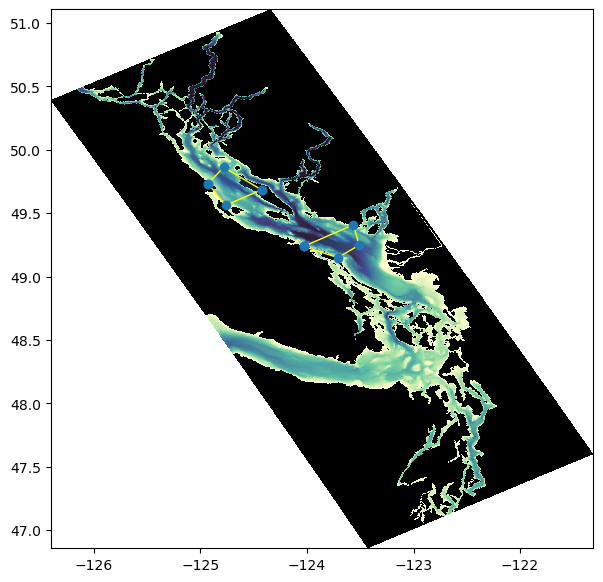

In [9]:
polygon_coors_N1, polygon_coors_S1 = def_polys()
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)

plot_polygon(polygon_coors_N1, ax=ax, edgecolor='yellow', fill='tab:ora)
plot_polygon(polygon_coors_S1, ax=ax, edgecolor='yellow')